In [5]:
## prereqs
import pandas as pd

# Data Dig, Ask me Questions / for data etc...

**srimmele@gmail.com**

## FCC Form 477 Data

Download and unzip from here: https://www.fcc.gov/form477/BroadbandData/Fixed/Dec15/Version%201/NY-Fixed-Dec2015.zip

**FCC Data Codes and Descriptions can be mystifying:** Check out their [resources](https://www.fcc.gov/general/form-477-resources-filers) for more info.

Quick-link to [FCC Data Dictionary](https://www.fcc.gov/general/explanation-broadband-deployment-data)

In [6]:
FCC = pd.read_csv('../NY-Fixed-Dec2015-v1.csv')
        

## Census Block Codes

The FCC organizes broadband access data by Census Bureau groupings, like so:

![Census ID Codes](http://proximityone.com/cv_dr_graphics/geo_block.jpg)

The counties of New York City are:

  *    005 - Bronx
  *   047 - Kings (Brooklyn)
  *  061 - New York (Manhattan)
  * 081 - Queens
  * 085 - Richmond (Staten Island)



[More detail on Census Blocks here](http://proximityone.com/geo_blocks.htm)

In [7]:

block_code = FCC.BlockCode.astype(str)

FCC['STATE_CODE'] = block_code.apply(lambda x: x[0:2])
FCC['COUNTY_CODE'] = block_code.apply(lambda x: x[2:5].lstrip("0"))
FCC['TRACT'] = block_code.apply(lambda x: x[5:11].lstrip("0"))
FCC['BLOCK'] = block_code.apply(lambda x: x[11:])
FCC['BLOCK_GROUP'] = block_code.apply(lambda x: x[11])
FCC['GEO_ID'] = block_code.apply(lambda x: x[:12])  # Unique to block group, like the GeoJSON used for mapping



FCC.head(1).T

0
LogRecNo                     110579
Provider_Id                   15865
FRN                         4057147
ProviderName        Adams CATV Inc.
DBAName             Adams CATV Inc.
HoldingCompanyName  Adams CATV Inc.
HocoNum                      190013
HocoFinal           Adams CATV Inc.
StateAbbr                        NY
BlockCode           360070123004060
TechCode                         42
Consumer                          1
MaxAdDown                        25
MaxAdUp                           5
Business                          1
MaxCIRDown                       25
MaxCIRUp                          5
STATE_CODE                       36
COUNTY_CODE                       7
TRACT                         12300
BLOCK                          4060
BLOCK_GROUP                       4
GEO_ID                 360070123004

## NYC Neighborhoods

[NYC DCP](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page) provides a handy mapping of 2010 Census Tracts to NYC Neighborhood Tabulation Areas (e.g., 'Allerton-Pelham Gardens')



In [8]:
NTA_to_CT = pd.read_excel('https://www1.nyc.gov/assets/planning/download/office/data-maps/nyc-population/census2010/nyc2010census_tabulation_equiv.xlsx', \
                          sheetname='NTA to 2010 CT equivalency',header=3 ,  \
                          converters = {'2010 NYC Borough Code': str, '2010 Census Bureau FIPS County Code':str ,\
                                      '2010 Census Tract':str})

## Have to fix some of the default formatting and drop an empty row
NTA_to_CT.rename(columns= {'Unnamed: 6':'NTA_Name'}, inplace=True)
NTA_to_CT.drop([0], inplace=True)

NTA_to_CT['BC'] = NTA_to_CT['2010 NYC Borough Code'].apply(lambda x: x.lstrip('0'))  # drop leading zeros
NTA_to_CT['CC'] = NTA_to_CT['2010 Census Bureau FIPS County Code'].apply(lambda x: x.lstrip('0'))  # drop leading zeros
NTA_to_CT['CT'] = NTA_to_CT['2010 Census Tract'].apply(lambda x: x.lstrip('0'))  # drop leading zeros

NTA_to_CT.head()

Borough 2010 Census Bureau FIPS County Code 2010 NYC Borough Code  \
1   Bronx                                 005                     2   
2   Bronx                                 005                     2   
3   Bronx                                 005                     2   
4   Bronx                                 005                     2   
5   Bronx                                 005                     2   

  2010 Census Tract  PUMA Neighborhood Tabulation Area (NTA)  \
1            031000  3704                               BX31   
2            031200  3704                               BX31   
3            031400  3704                               BX31   
4            031600  3704                               BX31   
5            031800  3704                               BX31   

                  NTA_Name BC CC     CT  
1  Allerton-Pelham Gardens  2  5  31000  
2  Allerton-Pelham Gardens  2  5  31200  
3  Allerton-Pelham Gardens  2  5  31400  
4  Allerton-Pelham Gardens  2  5  31600  
5  Allerton-Pelham Gardens  2  5  31800

In [9]:
FCC.head()

LogRecNo  Provider_Id      FRN     ProviderName          DBAName  \
0    110579        15865  4057147  Adams CATV Inc.  Adams CATV Inc.   
1    110580        15865  4057147  Adams CATV Inc.  Adams CATV Inc.   
2    110581        15865  4057147  Adams CATV Inc.  Adams CATV Inc.   
3    110582        15865  4057147  Adams CATV Inc.  Adams CATV Inc.   
4    110583        15865  4057147  Adams CATV Inc.  Adams CATV Inc.   

  HoldingCompanyName  HocoNum        HocoFinal StateAbbr        BlockCode  \
0    Adams CATV Inc.   190013  Adams CATV Inc.        NY  360070123004060   
1    Adams CATV Inc.   190013  Adams CATV Inc.        NY  360070124002034   
2    Adams CATV Inc.   190013  Adams CATV Inc.        NY  360070125003022   
3    Adams CATV Inc.   190013  Adams CATV Inc.        NY  360259705003144   
4    Adams CATV Inc.   190013  Adams CATV Inc.        NY  360179709003059   

       ...       MaxAdUp  Business  MaxCIRDown  MaxCIRUp  STATE_CODE  \
0      ...             5         1          25         5          36   
1      ...             5         1          25         5          36   
2      ...             5         1          25         5          36   
3      ...             5         1          25         5          36   
4      ...             5         1          25         5          36   

   COUNTY_CODE   TRACT BLOCK BLOCK_GROUP        GEO_ID  
0            7   12300  4060           4  360070123004  
1            7   12400  2034           2  360070124002  
2            7   12500  3022           3  360070125003  
3           25  970500  3144           3  360259705003  
4           17  970900  3059           3  360179709003  

[5 rows x 23 columns]

## Neighborhood level dataset

*FCC_Merged* is a dataset of provider-reported internet access data from FCC Form 477, at the Census Block Level. Each record includes other groupings (Census Block Group, Census Tract, NYC Neighborhood Tabulation Area, Borough) as well.

You can filter for different categories e.g, "Consumer Internet" and "Fiber" as you see fit, an example is shown below.

**FCC Data Codes and Descriptions can be mystifying:** Check out their [resources](https://www.fcc.gov/general/form-477-resources-filers) for more info 

In [10]:
FCC_merged = FCC.merge(NTA_to_CT, left_on=['COUNTY_CODE','TRACT'],right_on=['CC','CT'],how='inner')

print str(len(FCC_merged.BlockCode.unique())) + ' Blocks in base dataset (citywide)'

'''
Consumer: (0/1) where 1 = Provider can or does offer consumer/mass market/residential service in the block
'''
FCC_merged = FCC_merged[FCC_merged.Consumer == 1]

print str(len(FCC_merged.BlockCode.unique())) + ' blocks with consumer internet'

'''
TechCode: 10 is XDSL, 50 is Fiber to End User
'''
FCC_merged = FCC_merged[FCC_merged.TechCode == 50]

print str(len(FCC_merged.BlockCode.unique())) + ' blocks with consumer fiber internet'

FCC_merged.head(1).T


38774 Blocks in base dataset (citywide)
38762 blocks with consumer internet
26989 blocks with consumer fiber internet


2
LogRecNo                                                              8301172
Provider_Id                                                             17869
FRN                                                                   3469442
ProviderName                                            Verizon New York Inc.
DBAName                                                 Verizon New York Inc.
HoldingCompanyName                                Verizon Communications Inc.
HocoNum                                                                131425
HocoFinal                                         Verizon Communications Inc.
StateAbbr                                                                  NY
BlockCode                                                     360470065001000
TechCode                                                                   50
Consumer                                                                    1
MaxAdDown                                                                 100
MaxAdUp                                                                   100
Business                                                                    1
MaxCIRDown                                                                  0
MaxCIRUp                                                                    0
STATE_CODE                                                                 36
COUNTY_CODE                                                                47
TRACT                                                                    6500
BLOCK                                                                    1000
BLOCK_GROUP                                                                 1
GEO_ID                                                           360470065001
Borough                                                              Brooklyn
2010 Census Bureau FIPS County Code                                       047
2010 NYC Borough Code                                                       3
2010 Census Tract                                                      006500
PUMA                                                                     4005
Neighborhood Tabulation Area (NTA)                                       BK33
NTA_Name                             Carroll Gardens-Columbia Street-Red Hook
BC                                                                          3
CC                                                                         47
CT                                                                       6500

## Example Use

Here's a borough comparison of Maximum Advertised Download Speeds

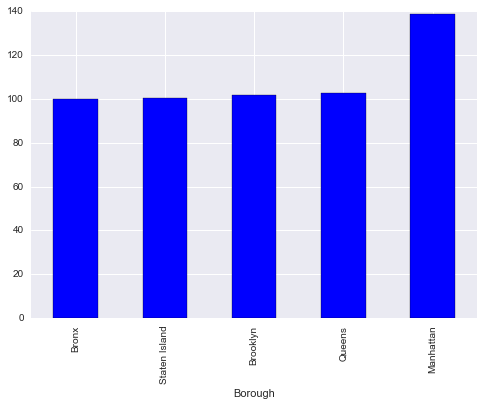

In [11]:
%matplotlib inline 
import seaborn

# to show charts in the notebook

FCC_merged.groupby(['Borough']).mean()['MaxAdDown'].sort_values().plot(kind='bar')